#### Download all the needed dependices and libraries 

In [179]:
import numpy as np
import pandas as pd
import folium # map rendering library
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests
import seaborn as sn
import matplotlib.pyplot as plt

### Loading and exploring an demograhics dataset 
The neighbourhood-profiles-2016-csv.csv contains  demographics infromation for each neighborhood. The demogrpahics information that are important to our problem is the total population, the 15-45 poulation, the number of educated people and the number of employers in each neighborhood


In [341]:
demographics_data=pd.read_csv('neighbourhood-data2011.csv', sep=',' , encoding='latin-1')
print("The shape of the demograhiics 2016 extra dataset",demographics_2016_extra_data.shape) 
demographics_data.head()

The shape of the demograhiics 2016 extra dataset (140, 4)


,Category,Topic,Attribute,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Population,Population,"Population, 2011",2615060.0,30279.0,21988.0,11904.0,29177.0,26918.0,15434.0,...,15004.0,21343.0,53350.0,11703.0,7826.0,13986.0,10578.0,11652.0,27713.0,14687.0
1,Population,Population,"Population, 2006",2503281.0,30156.0,21562.0,11656.0,27482.0,25439.0,14945.0,...,12517.0,20907.0,52461.0,11550.0,8051.0,14194.0,10497.0,11235.0,26140.0,14830.0
2,Population,Population,"Population percentage change, 2006 to 2011",4.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Population,Population,Population density per square kilometre,4149.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population,Dwellings,Total private dwellings,1107851.0,9341.0,7861.0,4840.0,17172.0,12118.0,6320.0,...,6931.0,8336.0,19181.0,5391.0,3645.0,6002.0,5550.0,7128.0,11722.0,5444.0


Selecting the important features and dropping the rest of the features.

In [342]:
important_features_index=[9,14,17,20,692,699,700,701,702,703,704,705,1368,1370,1371,1410,1411]
important_features_index=[x-2 for x in important_features_index]
demographics_data=demographics_data.iloc[important_features_index,:]


demographics_data=demographics_data.set_index('Attribute')
demographics_data=demographics_data.transpose()
new_columns_name=['Total population' ,'age 15-24','age 25-34','age 35-44','people with income','20-30 thousand','30-40 thousand','40-50 thousand','50-60 thousand','60-80 thousand','80-90 thousand','100 thousand and more','Total population over 15 for education','High school diploma or equivalent','Postsecondary certificate, diploma or degree','In the labour force','Employed']
demographics_data.columns=new_columns_name


demographics_data=demographics_data.reset_index(drop=False)
demographics_data.rename(columns={'index':'Neighborhood'},inplace=True)
demographics_data.drop(index=[0,1,2],axis=1,inplace=True)

demographics_data.reset_index(drop=True,inplace=True)
demographics_data.head()

,Neighborhood,Total population,age 15-24,age 25-34,age 35-44,people with income,20-30 thousand,30-40 thousand,40-50 thousand,50-60 thousand,60-80 thousand,80-90 thousand,100 thousand and more,Total population over 15 for education,High school diploma or equivalent,"Postsecondary certificate, diploma or degree",In the labour force,Employed
0,Agincourt North,30280,4165,3840,3845,25770,3800,3000,1915,1105,1195,325,185,25765,7480,12325,14925,13230
1,Agincourt South-Malvern West,21990,3110,2775,2955,18600,3170,2310,1340,965,805,200,180,18595,4840,9695,11025,9860
2,Alderwood,11900,1325,1520,1675,10210,1580,1475,1110,970,925,260,190,10210,2560,5355,6740,6240
3,Annex,29180,3915,7190,3990,25180,2975,2660,2345,1950,2225,1125,2490,25185,4275,19220,18085,16770
4,Banbury-Don Mills,26910,2715,2930,3970,22855,2910,2670,2405,1900,2245,1060,1770,22855,4715,15840,14000,13030


In [343]:
# calcaulating the number of 15-45 population and change the name of the columns
demographics_data['number of educated people']=(demographics_data['High school diploma or equivalent']+demographics_data['Postsecondary certificate, diploma or degree'])
demographics_data['number of 15-45']=(demographics_data['age 15-24']+demographics_data['age 25-34']+demographics_data['age 35-44'])
demographics_data['number of employers']=demographics_data['Employed']
demographics_data.drop(columns=new_columns_name[1:],axis=1,inplace=True)
demographics_data.sort_values(by='Neighborhood')
demographics_data.head()

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers
0,Agincourt North,30280,19805,11850,13230
1,Agincourt South-Malvern West,21990,14535,8840,9860
2,Alderwood,11900,7915,4520,6240
3,Annex,29180,23495,15095,16770
4,Banbury-Don Mills,26910,20555,9615,13030


### Loading and preprocessing  the geographical data

The graphical data (lat,long) for each neighborhood is used to get the venues information for each neighborhood from Foursquare API.
The Neighbourhood Crime Rates.csv is downloaded from the toronta open data portal.
The data is preprocessed by removing the unneeded part and convering it from strings into float.


In [135]:
long_lat=pd.read_csv('Neighbourhood Crime Rates.csv')
long_lat.head(5)

,_id,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,...,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,geometry
0,1,16,South Parkdale,85,21849,202,226,231,229,220,...,9,10,9,22,10.0,1.44,100.7,2.286974e+06,10802.832160,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,2,17,South Riverdale,70,27876,215,207,236,243,304,...,22,27,24,21,21.3,-0.13,75.3,1.096457e+07,43080.724701,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
2,3,18,St.Andrew-Windfields,40,17812,53,41,48,45,55,...,8,7,6,6,8.5,0.00,33.7,7.299580e+06,13025.997456,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4,19,Taylor-Massey,61,15683,127,92,97,107,123,...,5,2,4,3,3.5,-0.25,19.1,1.062970e+06,5940.700050,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
4,5,20,Humber Summit,21,12416,76,89,118,116,109,...,18,18,15,22,17.3,0.47,177.2,7.966905e+06,12608.573118,"{u'type': u'Polygon', u'coordinates': (((-79.5..."


In [136]:
columns=['Neighbourhood','geometry']
long_lat=long_lat.loc[:,columns]
long_lat.sort_values(by='Neighbourhood',inplace=True)
long_lat.reset_index(drop=True,inplace=True)
long_lat.head()

,Neighbourhood,geometry
0,Agincourt North,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
1,Agincourt South-Malvern West,"{u'type': u'Polygon', u'coordinates': (((-79.2..."
2,Alderwood,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
3,Annex,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
4,Banbury-Don Mills,"{u'type': u'Polygon', u'coordinates': (((-79.3..."


In [137]:
# claening the data and convert the numbers into int
def splitting(element):
    return element.split(',')

def cleaning_longitudes_lattuides(neighbourhood_long_latt):
    neighbourhood_long_latt=neighbourhood_long_latt[40:]
    neighbourhood_long_latt=neighbourhood_long_latt.split(')')
    neighbourhood_long_latt = [item.replace('}',"") for item in neighbourhood_long_latt]
    neighbourhood_long_latt = [item.replace(', (',"") for item in neighbourhood_long_latt]
    neighbourhood_long_latt = [item.replace('(',"") for item in neighbourhood_long_latt]    
    neighbourhood_long_latt=list(map(splitting, neighbourhood_long_latt))
    neighbourhood_long_latt= neighbourhood_long_latt[0:-3]
    for i in range(len(neighbourhood_long_latt)):        
        neighbourhood_long_latt[i][0]=float(neighbourhood_long_latt[i][0])
        neighbourhood_long_latt[i][1]=float(neighbourhood_long_latt[i][1])
    neighbourhood_long_latt=neighbourhood_long_latt[50]
    return neighbourhood_long_latt    

In [138]:
long_lat['Long_latt'] = long_lat.apply(lambda row : cleaning_longitudes_lattuides(row['geometry']), axis = 1) 
long_lat.head()

,Neighbourhood,geometry,Long_latt
0,Agincourt North,"{u'type': u'Polygon', u'coordinates': (((-79.2...","[-79.2816161258827, 43.797405754163]"
1,Agincourt South-Malvern West,"{u'type': u'Polygon', u'coordinates': (((-79.2...","[-79.2891688527481, 43.7851873380096]"
2,Alderwood,"{u'type': u'Polygon', u'coordinates': (((-79.5...","[-79.5532040267975, 43.5954996876866]"
3,Annex,"{u'type': u'Polygon', u'coordinates': (((-79.3...","[-79.4121466573202, 43.6744312990078]"
4,Banbury-Don Mills,"{u'type': u'Polygon', u'coordinates': (((-79.3...","[-79.326504539789, 43.7325704244428]"


In [139]:
demographics_data['long_latt']=long_lat['Long_latt']
neighbourhood_data=demographics_data
neighbourhood_data.head()

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt
0,Agincourt North,30280,19805,11850,13230,"[-79.2816161258827, 43.797405754163]"
1,Agincourt South-Malvern West,21990,14535,8840,9860,"[-79.2891688527481, 43.7851873380096]"
2,Alderwood,11900,7915,4520,6240,"[-79.5532040267975, 43.5954996876866]"
3,Annex,29180,23495,15095,16770,"[-79.4121466573202, 43.6744312990078]"
4,Banbury-Don Mills,26910,20555,9615,13030,"[-79.326504539789, 43.7325704244428]"


### Getting the venues data from the Foursquare API
Getting the venues information from the Foursquare API. The data reterived from the Foursquare are the number of venues per each neighborhoods and the number of gyms/fitness center per neighborhood

### Getting the Foursquare credintials 

In [157]:
CLIENT_ID = 'JYY4M43D3NMOD5NPPWAMDR2KI2YMMWFSE0OGN42PCL1T04MZ' # your Foursquare ID
CLIENT_SECRET = 'L42CIAPTOLFE2ELBEXK3V0ICG1J3JEDQEBN1KAUJAZ5L1LHW' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN ='3EDRXZUUMAQFC5435O11JUFGKZEP45U1FVFWQN2FRVV1DWXZ'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JYY4M43D3NMOD5NPPWAMDR2KI2YMMWFSE0OGN42PCL1T04MZ
CLIENT_SECRET:L42CIAPTOLFE2ELBEXK3V0ICG1J3JEDQEBN1KAUJAZ5L1LHW


### Get the venues that are near each neighborhood

In [162]:
def getting_number_tips(url):
    number_tips=0
    results_ = requests.get(url).json()
    for result in results_["response"]['groups'][0]['items']:
       if result['venue']['categories'][0]['name']=='Gym':
           gym_id=result['venue']['id']
           url_venue = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(gym_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
           result_number_tips = requests.get(url_venue).json() 
           number_tips=number_tips + result_number_tips['response']['venue']['tips']['count'] 
    return number_tips    
    
def getNearbyVenues(Neighborhood,longitude_latitude,radius):
        number_gyms=[]
        number_venues=[]
        number_tips=[]
        for name, lng_lat in zip(Neighborhood,longitude_latitude): 
            venues_list=[]
            print(lng_lat)
            lng=lng_lat[0]
            lat=lng_lat[1]
            print(name)
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
            # return only relevant information for each nearby venue
            venues_list.append([(
                name ,
                v['venue']['name'], 
                v['venue']['categories'][0]['name']) for v in results])
            
            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['Neighborhood','Venue','Venue Category']
            number_gyms_per_Neighborhoods=sum((nearby_venues['Venue Category']=='Gym / Fitness Center') | (nearby_venues['Venue Category']=='Gym') | (nearby_venues['Venue Category']=='Spa'))
            number_gyms=np.append(number_gyms,number_gyms_per_Neighborhoods)
            number_venues=np.append(number_venues,len(nearby_venues['Venue'].unique())-number_gyms_per_Neighborhoods)
            #number_tips=np.append(number_tips,getting_number_tips(url))
            
        venues_infomration= pd.DataFrame({'Neighborhood':Neighborhood,'number_venues': number_venues,'number_gyms':number_gyms})
        return(venues_infomration)

In [163]:
venues_infomration=getNearbyVenues(neighbourhood_data['Neighborhood'], neighbourhood_data['long_latt'],1000)

[-79.2816161258827, 43.797405754163]
Agincourt North
[-79.2891688527481, 43.7851873380096]
Agincourt South-Malvern West
[-79.5532040267975, 43.5954996876866]
Alderwood
[-79.4121466573202, 43.6744312990078]
Annex
[-79.326504539789, 43.7325704244428]
Banbury-Don Mills
[-79.430502667246, 43.7575784301813]
Bathurst Manor
[-79.3912583210563, 43.6606532521722]
Bay Street Corridor
[-79.3834514087178, 43.7640817777541]
Bayview Village
[-79.3714520973767, 43.8045095069159]
Bayview Woods-Steeles
[-79.4274225674093, 43.7096042496363]
Bedford Park-Nortown
[-79.4647302913102, 43.692362616926]
Beechborough-Greenbrook
[-79.2400495723641, 43.7466257573718]
Bendale
[-79.2698201397013, 43.6958383345337]
Birchcliffe-Cliffside
[-79.5168068949797, 43.7709321923081]
Black Creek
[-79.3354787855352, 43.6725854142185]
Blake-Jones
[-79.4400702000353, 43.7055855281681]
Briar Hill-Belgravia
[-79.4022194797677, 43.7441935625678]
Bridle Path-Sunnybrook-York Mills
[-79.3630337935626, 43.683474326764404]
Broadview No

In [164]:
neighbourhood_data['number_gyms']= venues_infomration['number_gyms']
neighbourhood_data['number_venues']= venues_infomration['number_venues']
neighbourhood_data.head()

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Agincourt North,30280,19805,11850,13230,"[-79.2816161258827, 43.797405754163]",0.0,26.0
1,Agincourt South-Malvern West,21990,14535,8840,9860,"[-79.2891688527481, 43.7851873380096]",0.0,34.0
2,Alderwood,11900,7915,4520,6240,"[-79.5532040267975, 43.5954996876866]",1.0,17.0
3,Annex,29180,23495,15095,16770,"[-79.4121466573202, 43.6744312990078]",3.0,63.0
4,Banbury-Don Mills,26910,20555,9615,13030,"[-79.326504539789, 43.7325704244428]",2.0,14.0


In [165]:
# saving the Feature data into csv file 
neighbourhood_data.to_csv(r'C:/Users/youss/Downloads/neighborhood_data.csv',index=False)

### Data exploration 

### visulazing the neighborhoods on the map

In [177]:
# visualizing the neighbrhods on the map
import folium # map rendering library

address = 'Toronto City, ON'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [178]:
# create map of Toronto using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat_lng, neighborhood in zip(long_lat['Long_latt'],long_lat['Neighbourhood']):
    lng=lat_lng[0]
    lat=lat_lng[1]
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [191]:
# Converting the rows that converting numerical data from object to int
neighbourhood_data=neighbourhood_data.astype({'Total population':int ,'number of educated people': int,'number of 15-45':int,'number of employers':int})


In [192]:
neighbourhood_data.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,18676.928571,12801.250000,8102.035714,9049.357143,0.914286,40.328571
std,9099.209342,6606.830919,4541.999603,4631.833115,1.322118,29.377582
min,6490.000000,3585.000000,2805.000000,2790.000000,0.000000,4.000000
25%,11851.250000,8052.500000,5060.000000,5916.250000,0.000000,18.000000
50%,16367.500000,11290.000000,6822.500000,7595.000000,0.000000,27.500000
75%,22410.000000,16352.500000,9885.000000,10930.000000,1.000000,59.250000
max,53350.000000,39080.000000,29695.000000,31375.000000,7.000000,100.000000


The relation between the total population and the population aged 15-45 and the number of educated people and number of employers.

Text(0.5, 1.0, 'Total population VS number of employers ')

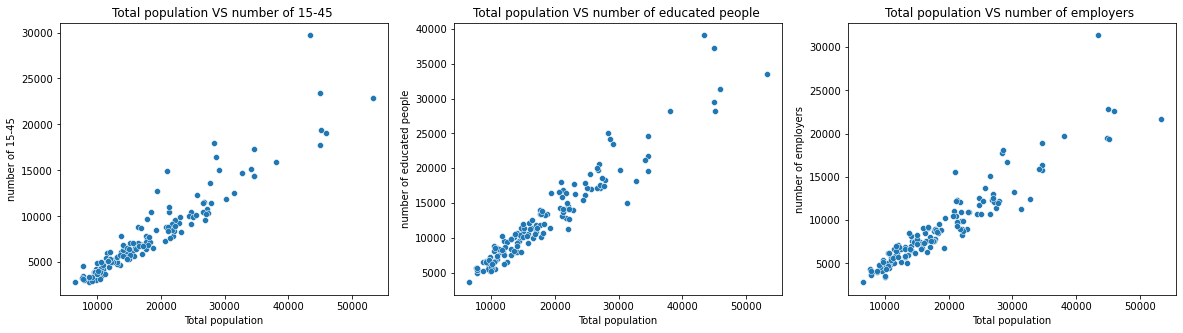

In [230]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5),sharex=True, sharey=False)
sn.scatterplot(ax=axs[0],data=neighbourhood_data,x='Total population',y='number of 15-45')
axs[0].set_title('Total population VS number of 15-45 ')
sn.scatterplot(ax=axs[1],data=neighbourhood_data,x='Total population',y='number of educated people')
axs[1].set_title('Total population VS number of educated people ')
sn.scatterplot(ax=axs[2],data=neighbourhood_data,x='Total population',y='number of employers')
axs[2].set_title('Total population VS number of employers ')

The distrubition of each of the features.

In [345]:
def plot_histograms(data_used):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    sn.histplot(ax=axs[0,0],data=data_used,x='Total population')
    axs[0,0].set_title('Total population')
    sn.histplot(ax=axs[0,1],data=data_used,x='number of 15-45')
    axs[0,1].set_title('number of 15-45')
    sn.histplot(ax=axs[0,2],data=data_used,x='number of educated people')
    axs[0,2].set_title('number of educated people ')

    sn.histplot(ax=axs[1,0],data=data_used,x='number of employers')
    axs[1,0].set_title('number of employers')

    sn.histplot(ax=axs[1,1],data=data_used,x='number_gyms')
    axs[1,1].set_title('number_gyms')
    sn.histplot(ax=axs[1,2],data=data_used,x='number_venues')
    axs[1,2].set_title('number_venues ')

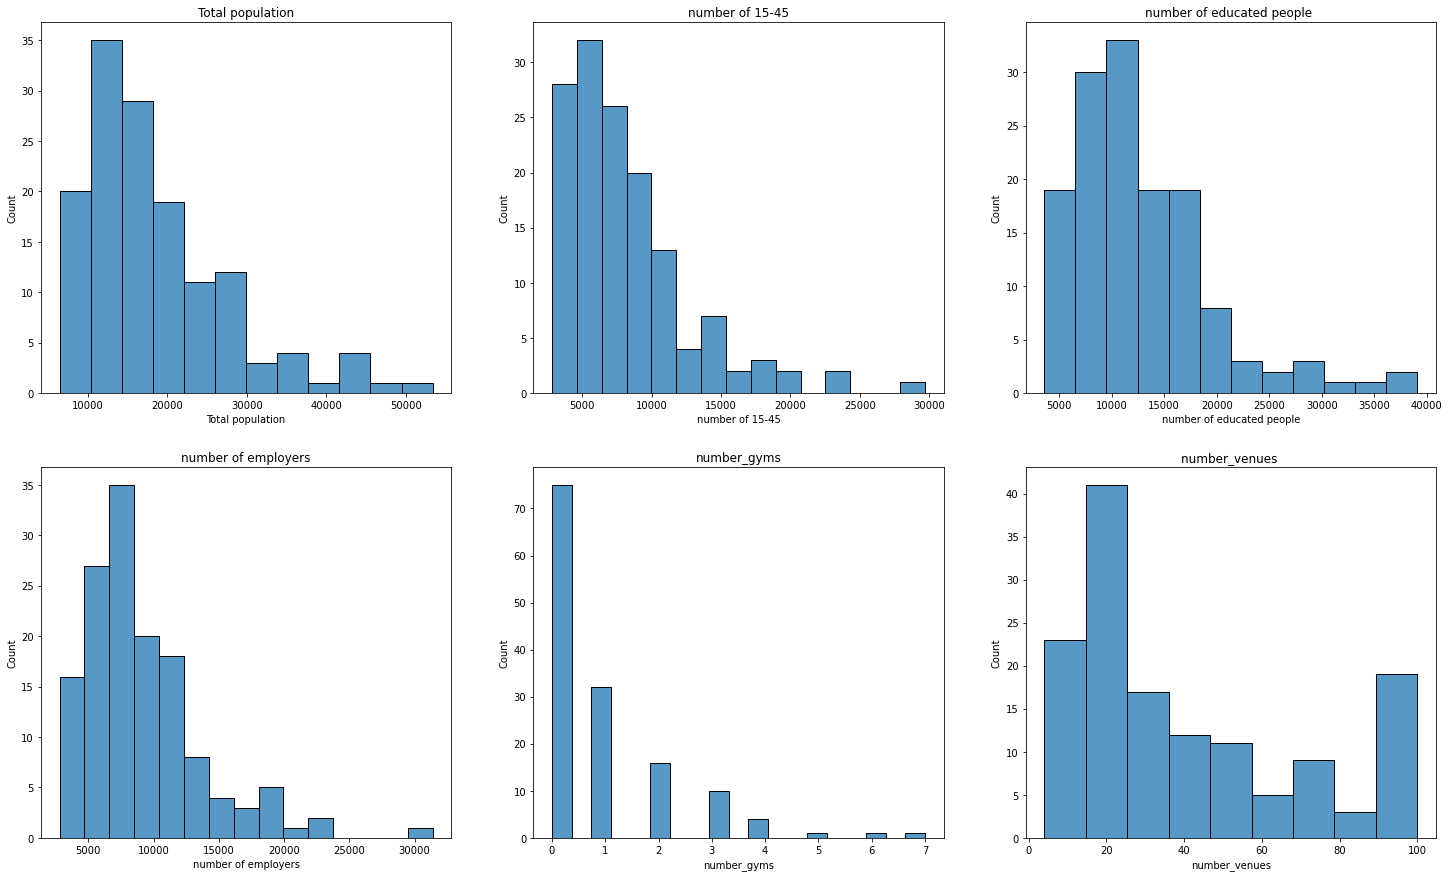

In [344]:
plot_histograms(neighbourhood_data)

The chnage of the number of gyms and number of venues with the total population

Text(0.5, 1.0, 'Total population VS number of venues')

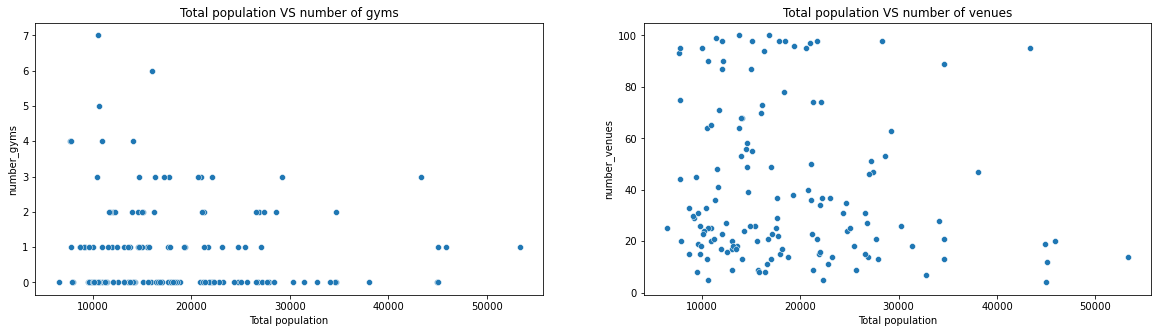

In [231]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5),sharex=True, sharey=False)
sn.scatterplot(ax=axs[0],data=neighbourhood_data,x='Total population',y='number_gyms')
axs[0].set_title('Total population VS number of gyms')
sn.scatterplot(ax=axs[1],data=neighbourhood_data,x='Total population',y='number_venues')
axs[1].set_title('Total population VS number of venues')


The distrubition of the number of gyms with the rest of the features 

Text(0.5, 1.0, 'number_venues')

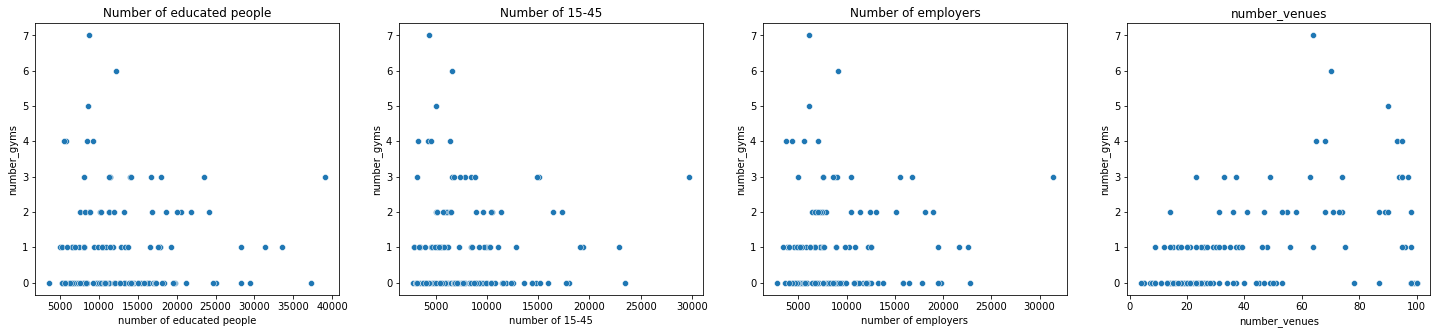

In [257]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

sn.scatterplot(ax=axs[0],data=neighbourhood_data,x='number of educated people',y='number_gyms')
axs[0].set_title('Number of educated people')

sn.scatterplot(ax=axs[1],data=neighbourhood_data,x='number of 15-45',y='number_gyms')
axs[1].set_title('Number of 15-45')

sn.scatterplot(ax=axs[2],data=neighbourhood_data,x='number of employers',y='number_gyms')
axs[2].set_title('Number of employers')

sn.scatterplot(ax=axs[3],data=neighbourhood_data,x='number_venues',y='number_gyms')
axs[3].set_title('number_venues')

In [166]:
neighbourhood_data_complete=pd.read_csv(r'C:/Users/youss/Downloads/neighborhood_data.csv')
neighbourhood_data_complete.head()

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues
0,Agincourt North,30280.0,19805.0,11850.0,13230.0,"[-79.2816161258827, 43.797405754163]",0.0,26.0
1,Agincourt South-Malvern West,21990.0,14535.0,8840.0,9860.0,"[-79.2891688527481, 43.7851873380096]",0.0,34.0
2,Alderwood,11900.0,7915.0,4520.0,6240.0,"[-79.5532040267975, 43.5954996876866]",1.0,17.0
3,Annex,29180.0,23495.0,15095.0,16770.0,"[-79.4121466573202, 43.6744312990078]",3.0,63.0
4,Banbury-Don Mills,26910.0,20555.0,9615.0,13030.0,"[-79.326504539789, 43.7325704244428]",2.0,14.0


### Clustering 

In [167]:
# preparing the data for clustering 
neighbourhood_data_clustering=neighbourhood_data_complete.drop(columns=['Neighborhood','long_latt'])
neighbourhood_data_clustering.head()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues
0,30280.0,19805.0,11850.0,13230.0,0.0,26.0
1,21990.0,14535.0,8840.0,9860.0,0.0,34.0
2,11900.0,7915.0,4520.0,6240.0,1.0,17.0
3,29180.0,23495.0,15095.0,16770.0,3.0,63.0
4,26910.0,20555.0,9615.0,13030.0,2.0,14.0


In [168]:
neighbourhood_data_normalized=(neighbourhood_data_clustering-neighbourhood_data_clustering.min())/(neighbourhood_data_clustering.max()-neighbourhood_data_clustering.min())
neighbourhood_data_normalized.head()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues
0,0.507682,0.456966,0.336370,0.365227,0.000000,0.229167
1,0.330773,0.308494,0.224433,0.247333,0.000000,0.312500
2,0.115450,0.121989,0.063778,0.120693,0.142857,0.135417
3,0.484208,0.560924,0.457047,0.489068,0.428571,0.614583
4,0.435766,0.478096,0.253254,0.358230,0.285714,0.104167


### Choosing the number of clusters 

Text(0, 0.5, 'Average distance to cluster center')

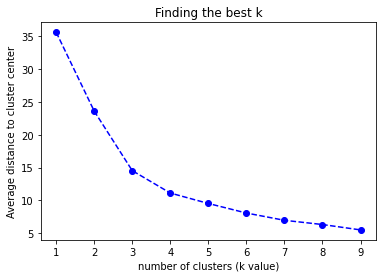

In [277]:
scores=[]
K=np.arange(1,10)
for k in K:
    kmeans_k=KMeans(k)
    model=kmeans_k.fit(neighbourhood_data_normalized)
    labels=model.predict(neighbourhood_data_normalized)
    score=model.score(neighbourhood_data_normalized)
    scores=np.append(scores,score)
plt.plot(K,-1*scores,linestyle='--', marker='o', color='b')
plt.title('Finding the best k')
plt.xlabel('number of clusters (k value)')
plt.ylabel('Average distance to cluster center')

In [303]:
from sklearn.cluster import KMeans
kclusters = 3
kmeans_model=KMeans(n_clusters=kclusters)
kmeans_model.fit(neighbourhood_data_normalized)

KMeans(n_clusters=3)

In [304]:
neighbourhood_data_complete['Labels']=kmeans_model.labels_
neighbourhood_data_clustering['Labels']=kmeans_model.labels_
neighbourhood_data_clustering.head()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
0,30280.0,19805.0,11850.0,13230.0,0.0,26.0,0
1,21990.0,14535.0,8840.0,9860.0,0.0,34.0,1
2,11900.0,7915.0,4520.0,6240.0,1.0,17.0,1
3,29180.0,23495.0,15095.0,16770.0,3.0,63.0,0
4,26910.0,20555.0,9615.0,13030.0,2.0,14.0,0


### Visualizing the clusters 

#### Visualzing the neighborhoods of each cluster on the map 

In [305]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat_lon, poi, cluster in zip(neighbourhood_data['long_latt'], neighbourhood_data_complete['Neighborhood'], neighbourhood_data_complete['Labels']):
    lat=lat_lon[1]
    lon=lat_lon[0]
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

### The properteries of the clusters

In [306]:
label_0=neighbourhood_data_clustering[neighbourhood_data_clustering['Labels']==0]
label_1=neighbourhood_data_clustering[neighbourhood_data_clustering['Labels']==1]
label_2=neighbourhood_data_clustering[neighbourhood_data_clustering['Labels']==2]


In [307]:
label_0.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,31538.382353,21854.558824,14057.647059,15292.352941,0.676471,32.970588,0.0
std,7958.399672,6294.231651,4770.428676,4651.130888,0.944541,24.274298,0.0
min,21135.000000,15020.000000,8450.000000,10715.000000,0.000000,4.000000,0.0
25%,26550.000000,17437.500000,10406.250000,12125.000000,0.000000,15.750000,0.0
50%,28107.500000,19632.500000,12460.000000,13130.000000,0.000000,25.500000,0.0
75%,34631.250000,24517.500000,16357.500000,18012.500000,1.000000,46.750000,0.0
max,53350.000000,39080.000000,29695.000000,31375.000000,3.000000,98.000000,0.0


In [284]:
def plot_histograms(data_used):
    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    sn.histplot(ax=axs[0,0],data=data_used,x='Total population')
    axs[0,0].set_title('Total population')
    sn.histplot(ax=axs[0,1],data=data_used,x='number of 15-45')
    axs[0,1].set_title('number of 15-45')
    sn.histplot(ax=axs[0,2],data=data_used,x='number of educated people')
    axs[0,2].set_title('number of educated people ')

    sn.histplot(ax=axs[1,0],data=data_used,x='number of employers')
    axs[1,0].set_title('number of employers')

    sn.histplot(ax=axs[1,1],data=data_used,x='number_gyms')
    axs[1,1].set_title('number_gyms')
    sn.histplot(ax=axs[1,2],data=data_used,x='number_venues')
    axs[1,2].set_title('number_venues ')

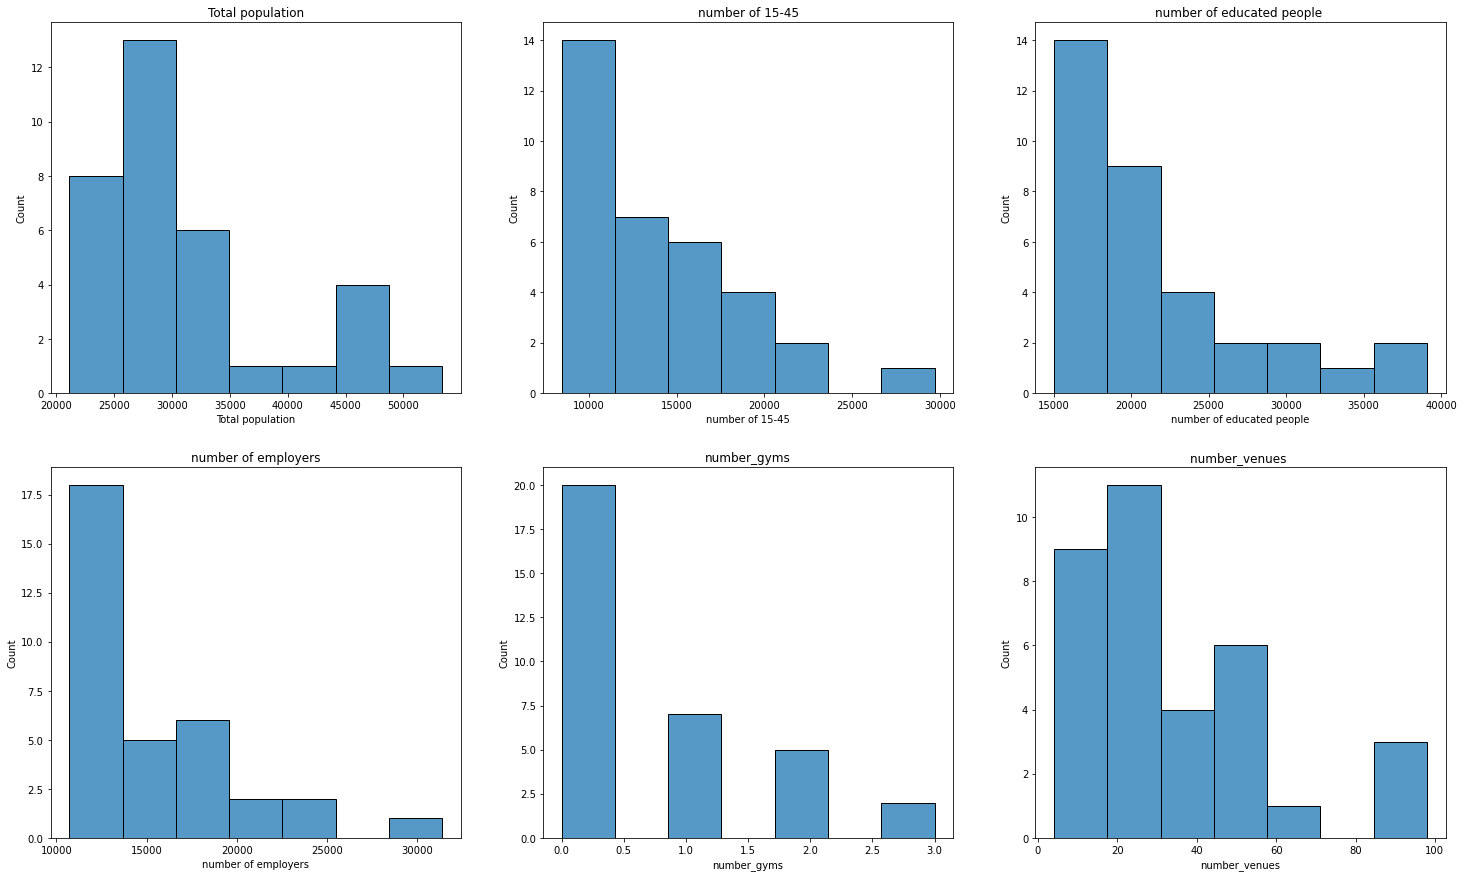

In [308]:
plot_histograms(label_0)


In [309]:
label_1.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,14469.859155,9503.732394,5832.183099,6679.788732,0.450704,23.309859,1.0
std,4531.205451,3063.223409,1995.527451,2010.455960,0.751926,11.218087,0.0
min,6490.000000,3585.000000,2805.000000,2790.000000,0.000000,5.000000,1.0
25%,10532.500000,6765.000000,4007.500000,4995.000000,0.000000,15.000000,1.0
50%,13535.000000,9600.000000,5550.000000,6655.000000,0.000000,21.000000,1.0
75%,17662.500000,11625.000000,7097.500000,8107.500000,1.000000,29.500000,1.0
max,23185.000000,16330.000000,11035.000000,11045.000000,3.000000,53.000000,1.0


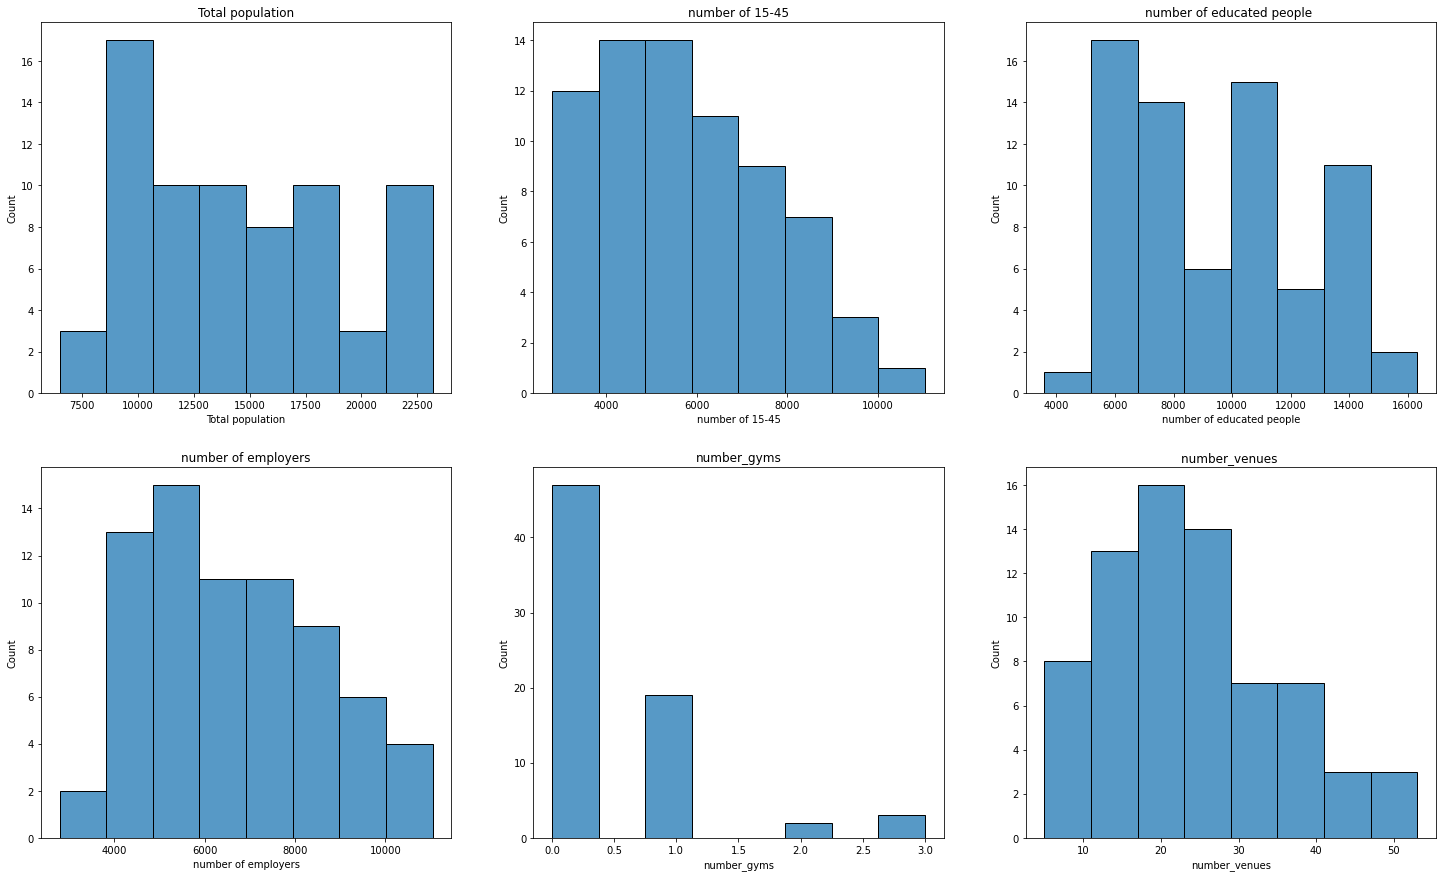

In [310]:
plot_histograms(label_1)

In [311]:
label_2.describe()

,Total population,number of educated people,number of 15-45,number of employers,number_gyms,number_venues,Labels
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,14717.285714,10695.857143,6921.142857,7791.571429,2.085714,82.000000,2.0
std,4028.120337,3383.702394,2527.695732,2461.997566,1.788385,15.835552,0.0
min,7655.000000,4980.000000,3240.000000,3450.000000,0.000000,49.000000,2.0
25%,11877.500000,8505.000000,5242.500000,6675.000000,1.000000,69.000000,2.0
50%,14610.000000,10345.000000,6380.000000,7515.000000,2.000000,87.000000,2.0
75%,17315.000000,12092.500000,8145.000000,8950.000000,3.000000,96.500000,2.0
max,22080.000000,18010.000000,14920.000000,15535.000000,7.000000,100.000000,2.0


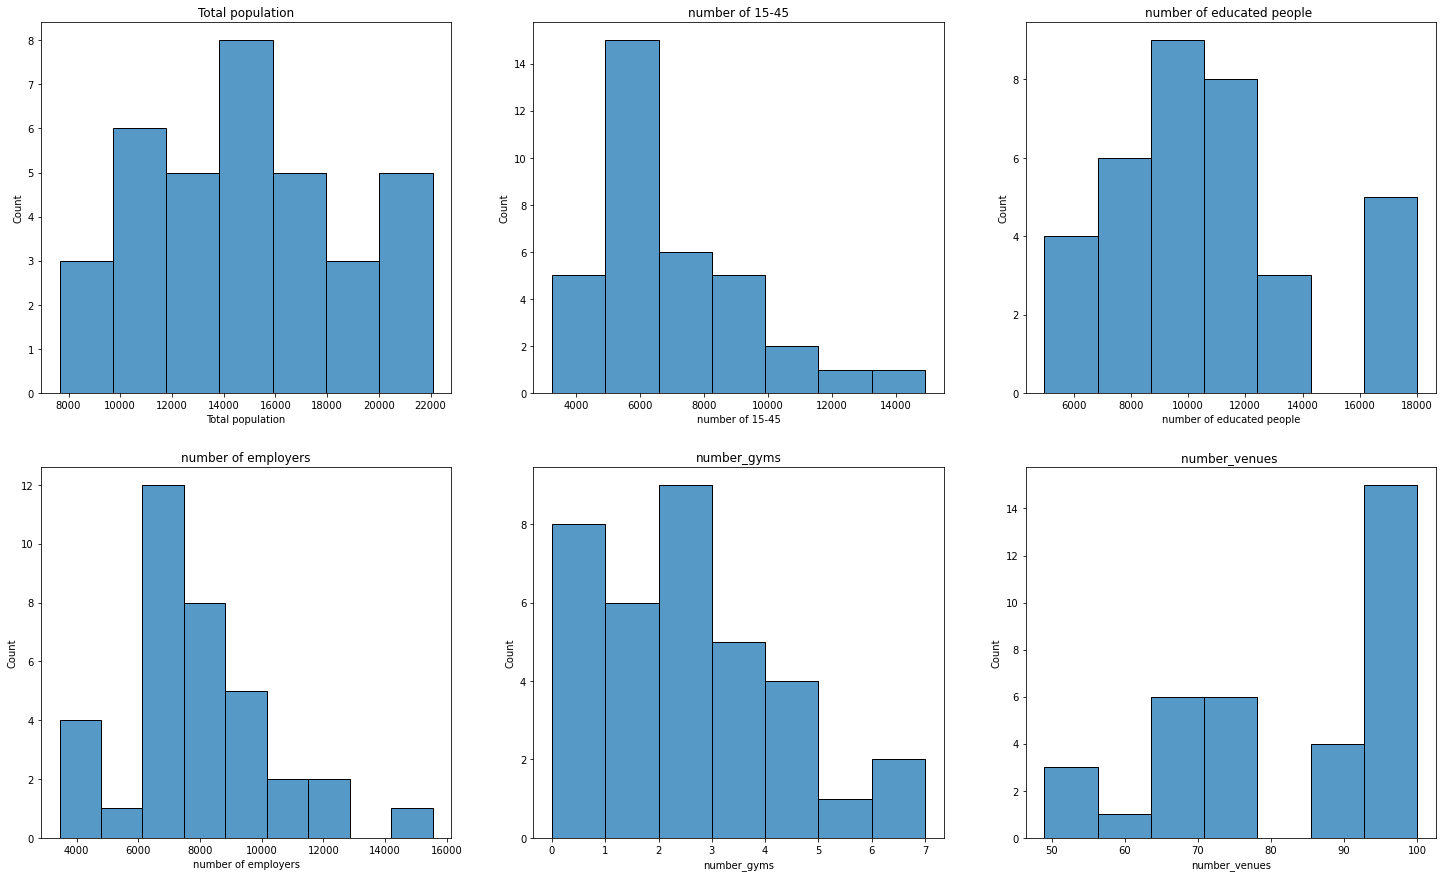

In [312]:
plot_histograms(label_2)

In [325]:
neighborhoods_0=neighbourhood_data_complete[neighbourhood_data_complete['Labels']==0]
neighborhoods_1=neighbourhood_data_complete[neighbourhood_data_complete['Labels']==1]
neighborhoods_2=neighbourhood_data_complete[neighbourhood_data_complete['Labels']==2]


### finding the best neighborhoods in the third cluster 

In [333]:
neighborhoods_2[neighborhoods_2['number_gyms']==0].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Labels
94,Palmerston-Little Italy,13735.0,10515.0,7870.0,8555.0,"[-79.4179822658754, 43.6552544722333]",0.0,100.0,2
119,Trinity-Bellwoods,16805.0,10605.0,8750.0,9155.0,"[-79.4067961746276, 43.6542865396434]",0.0,100.0,2
34,Dufferin Grove,11450.0,8005.0,6020.0,6650.0,"[-79.4316412650605, 43.6527430564478]",0.0,99.0,2
50,High Park-Swansea,21750.0,16420.0,9205.0,12060.0,"[-79.4521493275074, 43.6551927866022]",0.0,98.0,2
62,Kensington-Chinatown,18500.0,13210.0,10420.0,9495.0,"[-79.3889278224463, 43.6563478260557]",0.0,98.0,2
103,Roncesvalles,15050.0,10170.0,7135.0,8255.0,"[-79.4521493275074, 43.6551927866022]",0.0,98.0,2
19,Cabbagetown-South St. James Town,12050.0,9595.0,5335.0,7155.0,"[-79.3713421467449, 43.6718887916088]",0.0,87.0,2
92,O'Connor-Parkview,18315.0,12015.0,7195.0,8480.0,"[-79.4298991024178, 43.6838873093489]",0.0,78.0,2


In [336]:
neighborhoods_2[neighborhoods_2['number_gyms']==1].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Labels
89,North St. James Town,17825.0,13355.0,9720.0,8935.0,"[-79.376270792038, 43.6664293113267]",1.0,98.0,2
6,Bay Street Corridor,19345.0,16495.0,12800.0,10220.0,"[-79.3912583210563, 43.6606532521722]",1.0,96.0,2
100,Regent Park,10010.0,5820.0,4940.0,3450.0,"[-79.3564502940338, 43.6644904578707]",1.0,95.0,2
14,Blake-Jones,7765.0,4980.0,3475.0,3805.0,"[-79.3354787855352, 43.6725854142185]",1.0,75.0,2
27,Corso Italia-Davenport,13735.0,8005.0,6170.0,6700.0,"[-79.4521351447371, 43.6720006802834]",1.0,64.0,2
68,Lawrence Park North,14540.0,10345.0,5550.0,7515.0,"[-79.4049913405976, 43.7359806040823]",1.0,56.0,2


### finding the best neigborhoods in the first cluster

In [337]:
neighborhoods_0[neighborhoods_0['number_gyms']==0].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Labels
23,Church-Yonge Corridor,28345.0,25065.0,17970.0,17795.0,"[-79.3830705117445, 43.6613720049663]",0.0,98.0,0
76,Milliken,27160.0,17170.0,10765.0,12115.0,"[-79.2885873540872, 43.8067440626433]",0.0,51.0,0
116,The Beaches,21135.0,15820.0,8450.0,12155.0,"[-79.293211134959, 43.6800049510967]",0.0,50.0,0
58,Islington-City Centre West,38070.0,28235.0,15960.0,19735.0,"[-79.541660068977, 43.6150511840077]",0.0,47.0,0
31,Dorset Park,24360.0,15435.0,9995.0,10715.0,"[-79.26826826942602, 43.7601505266218]",0.0,31.0,0
124,West Humber-Clairville,34100.0,21195.0,15145.0,15865.0,"[-79.5558065968119, 43.7073093326377]",0.0,28.0,0
30,Don Valley Village,26735.0,19700.0,11600.0,12325.0,"[-79.3662204557787, 43.790141293136706]",0.0,27.0,0
0,Agincourt North,30280.0,19805.0,11850.0,13230.0,"[-79.2816161258827, 43.797405754163]",0.0,26.0,0
112,Steeles,25010.0,17135.0,9915.0,10745.0,"[-79.3089876934767, 43.8082759877451]",0.0,25.0,0
24,Clairlea-Birchmount,24775.0,16145.0,10450.0,11720.0,"[-79.2698075136083, 43.7016197049505]",0.0,24.0,0


In [339]:
neighborhoods_0[neighborhoods_0['number_gyms']==1].sort_values(by='number_venues',ascending=False)

,Neighborhood,Total population,number of educated people,number of 15-45,number of employers,long_latt,number_gyms,number_venues,Labels
128,Wexford/Maryvale,27020.0,17625.0,10255.0,12515.0,"[-79.3195548771288, 43.7679300520975]",1.0,46.0,0
86,Newtonbrook West,23050.0,17790.0,9875.0,10900.0,"[-79.4270213613855, 43.7772079217892]",1.0,37.0,0
113,Stonegate-Queensway,24690.0,17820.0,9190.0,12550.0,"[-79.48496738444501, 43.6412304354618]",1.0,35.0,0
105,Rouge,45905.0,31355.0,19040.0,22630.0,"[-79.200181515255, 43.8036974725661]",1.0,20.0,0
125,Westminster-Branson,25445.0,19235.0,10180.0,12245.0,"[-79.4470012598403, 43.7670517885172]",1.0,18.0,0
132,Woburn,53350.0,33590.0,22885.0,21665.0,"[-79.2183581838386, 43.7490457922858]",1.0,14.0,0
73,Malvern,45085.0,28240.0,19360.0,19425.0,"[-79.2259603274949, 43.7889846980208]",1.0,12.0,0
